#**RESUME CATEGORIZOR**#

#**1.ANALYSING DATASET**#

In [ ]:
#importing packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading Dataset
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
#data view
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
#data shape
df.shape

(962, 2)

In [ ]:
#data individual items count
df_dict = dict(df['Category'].value_counts())
df_dict

{'Java Developer': 84,
 'Testing': 70,
 'DevOps Engineer': 55,
 'Python Developer': 48,
 'Web Designing': 45,
 'HR': 44,
 'Hadoop': 42,
 'Blockchain': 40,
 'ETL Developer': 40,
 'Operations Manager': 40,
 'Data Science': 40,
 'Sales': 40,
 'Mechanical Engineer': 40,
 'Arts': 36,
 'Database': 33,
 'Electrical Engineering': 30,
 'Health and fitness': 30,
 'PMO': 30,
 'Business Analyst': 28,
 'DotNet Developer': 28,
 'Automation Testing': 26,
 'Network Security Engineer': 25,
 'SAP Developer': 24,
 'Civil Engineer': 24,
 'Advocate': 20}

In [ ]:
#saving categorical values_names for future purpose
df_before_cat =df['Category'].unique()

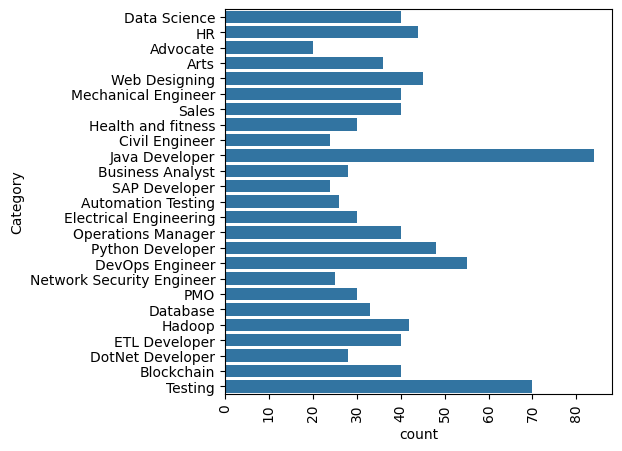

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

#**2.Exploring Resume , Text modification and Vectorization**#

**1.Exploring Resume**

In [ ]:
df['Category'].iloc[0]

'Data Science'

In [ ]:
df['Resume'].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**2.Removal of unwanted text**

In [ ]:
#using the module re (regular explessions)
#you can remove almost all unwanted text
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
#lets apply cleanResume on first resume
df['Resume'][0]= cleanResume(df['Resume'][0])
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
#thus now lets cl;ean whio dataset
# which can be done simply by using apply function
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:

#lets check once
df['Resume'].head()

0    Skills Programming Languages Python pandas num...
1    Education Details May 2013 to May 2017 B E UIT...
2    Areas of Interest Deep Learning Control System...
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Education Details MCA YMCAUST Faridabad Haryan...
Name: Resume, dtype: object

In [ ]:
#it's cleaned.

**3.Converting words into categorical values**

In [ ]:
#which can be done by label encoder to 'Category' column.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#convert into categorical values
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:

#lets see its unique_values now
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# this is my technique in converting a dictionary between numbers and categories
dict_cat = [(df['Category'].unique()[i],df_before_cat[i]) for i in range(len(df['Category'].unique()))]
dict_cat= dict(dict_cat)
dict_cat

{6: 'Data Science',
 12: 'HR',
 0: 'Advocate',
 1: 'Arts',
 24: 'Web Designing',
 16: 'Mechanical Engineer',
 22: 'Sales',
 14: 'Health and fitness',
 5: 'Civil Engineer',
 15: 'Java Developer',
 4: 'Business Analyst',
 21: 'SAP Developer',
 2: 'Automation Testing',
 11: 'Electrical Engineering',
 18: 'Operations Manager',
 20: 'Python Developer',
 8: 'DevOps Engineer',
 17: 'Network Security Engineer',
 19: 'PMO',
 7: 'Database',
 13: 'Hadoop',
 10: 'ETL Developer',
 9: 'DotNet Developer',
 3: 'Blockchain',
 23: 'Testing'}

**4.Vectorization of Resume**

Vectorization means keaping a track of bitwise multidimentional lists
which can instantially can decide the probality of occurance.

For example sentence : I am good at NLP

its vectorizor :**[[  1 , 0, 0 ,0 ,0 ],[  0 , 1, 0 ,0 ,0 ],[  0 , 0, 1 ,0,0 ],[  0 , 0, 0 ,1 ,0 ],[  0 , 0, 0 ,0 ,1 ]]**

   

In [ ]:
# simple steps for vectorzation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText  = tfidf.transform(df['Resume'])


In [ ]:
# lets see compacked vector
requredText #its about (962,7351) dimensionality shape

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

**5.Now Since all the verbal are now stats , it comes under**

Classification Problem

**we need to use Machine learning**   

In [ ]:
#Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

In [ ]:
#training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)

In [ ]:
#predicting the test accuracy
print(accuracy_score(y_test,ypred))

0.9844559585492227


**6.Saving the models**

In [ ]:
#here the model will be in the form of
#plk extensions which can be download and user anywere
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [ ]:
myresume = """" I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration

"""

**7.following the prediction pipeline**

In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]


**8.Prediction Convertor**

In [ ]:
print("myresume belongs to : ", dict_cat[prediction_id])

myresume belongs to :  Data Science
